In [1]:
#CONTENTS LIST:
#1. Crosstab of days_since_prior_order and number_of_orders columns to investigate missings
#  -drop missings from days_since_prior_order column

#2. Addressing PII: Drop first and last name columns 

#3. Drop merge column from dataset

#4. Question 3 part 1 completion (Compare customer behavior in different regions and create regional segmentation via creation
#   of region column based on state column from customers dataset) 
#  -create list variables based on regions
#  -create region data dictionary
#  -create new column called region and use .map to fill the column using region data dictionary 

#5. Question 3 part 2 completion (Determine if there's a difference in spending habits across regions)
#  -create new dataframe from region and spending flag columns called cross_reg_spend
#  -create crosstab of region and spending flag columns called cross_reg_spend

#6. Further examine crosstab cross_reg_spend for further insights and visualization creation
#  -calculate total counts of high and low spenders
#  -calculate proportions of high and low spenders
#  -create cross_reg_spend_bar, stacked bar chart, of proportion of high and low spenders by region

#7. Create crosstab called croos_reg_freq of region and frequency flag columns to examine differences in ordering habits 

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Creating string for project folder path
path=r"C:\Users\HP\02-2024 Instacart Basket Analysis"

In [4]:
"""
File: orders_products_aggregated_all.pkl
Author:Erica Henry
Date: 3/3/24

#Description: Importing of orders_products_aggregated_all.pkl
"""

ords_prods_merge=pd.read_pickle(os.path.join(path,"02 Data","Prepared Data","orders_products_aggregated_all.pkl"))

In [5]:
#Create crosstab of days_since_prior_order and number_of_orders columns to investigate missings in days_since_prior_order column
crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['number_of_orders'], dropna = False)

In [6]:
crosstab.to_clipboard()

In [7]:
#Remove  misssings from days_since_prior_order column
ords_prods_merge.dropna(subset= ['days_since_prior_order'], inplace = True)

In [8]:
#Check output
ords_prods_merge['days_since_prior_order'].value_counts(dropna=False)

days_since_prior_order
7.0     3476198
30.0    3067374
6.0     2517498
5.0     2124434
4.0     2078648
8.0     1931945
3.0     1876188
2.0     1463724
9.0     1217841
14.0    1029656
10.0     967187
1.0      940474
13.0     851114
11.0     820761
12.0     774164
15.0     671458
16.0     461335
0.0      448329
21.0     444142
17.0     382114
20.0     379732
18.0     350587
19.0     334882
22.0     308849
28.0     253151
23.0     225834
27.0     204061
24.0     193421
25.0     180417
26.0     177775
29.0     175470
Name: count, dtype: int64

In [9]:
#Question 2 Career Foundry Task: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
##Answer: I have decided to scrub the first and last name columns.
ords_prods_merge = ords_prods_merge.drop(columns = ['First Name', 'Last Name'])

In [10]:
#Check output
ords_prods_merge.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,number_of_times_reordered,product_name,...,Spending_flag,Median Customer Frequency,Frequency flag,Gender,State,Age,number_of_dependents,fam_status,income,_merge
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,both


In [11]:
#Drop merge column
ords_prods_merge = ords_prods_merge.drop(columns = ['_merge'])

In [12]:
"""
File: orders_products_aggregated_all.pkl
Author:Erica Henry
Date: 3/3/24

#Description: Quesion 3 part 1 Career Foundry Task: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
"""

#Print frequency counts of state column
ords_prods_merge["State"].value_counts(dropna=False)

State
Pennsylvania            626003
California              619377
Rhode Island            616005
Georgia                 615535
New Mexico              613252
Arizona                 613146
North Carolina          611018
Oklahoma                610954
Alaska                  607402
Minnesota               606952
Massachusetts           606002
Wyoming                 603254
Virginia                600998
Missouri                600027
Texas                   599536
Colorado                599168
Maine                   597710
North Dakota            597399
Alabama                 596749
Delaware                596476
Louisiana               596377
Kansas                  596360
South Carolina          596268
Nevada                  595274
Arkansas                595096
Oregon                  595079
New York                594878
Montana                 594458
Washington              593357
South Dakota            592697
Hawaii                  592166
Illinois                592080
Ke

In [13]:
# Create list variables based on regions\n",
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [14]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [15]:
South =  ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [16]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [17]:
#Create data dictionary for Northeast region
region_dict = {state: 'Northeast' for state in Northeast}

In [18]:
#Update data dictionary to include Midwest region 
region_dict.update ({state: 'Midwest' for state in Midwest})

In [19]:
#Update data dictionary to include South region 
region_dict.update ({state: 'South' for state in South})

In [20]:
#Update data dictionary to include West region 
region_dict.update ({state: 'West' for state in West})

In [21]:
#Create new column called region and use .map to fill the column using region data dictionary 
ords_prods_merge['Region'] = ords_prods_merge['State'].map(region_dict)

In [22]:
#Check output
ords_prods_merge.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,number_of_times_reordered,product_name,...,Spending_flag,Median Customer Frequency,Frequency flag,Gender,State,Age,number_of_dependents,fam_status,income,Region
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,3,married,40423,South


In [23]:
#Print the frequency of new column 
ords_prods_merge["Region"].value_counts(dropna=False)

Region
South        10099817
West          7765088
Midwest       7107586
Northeast     5356272
Name: count, dtype: int64

In [24]:
"""
File: orders_products_aggregated_all.pkl
Author:Erica Henry
Date: 3/3/24

#Description: Question 3 part 2 Career Foundry Task: Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
"""

#Create new df with only columns needed
cross_reg_spend = ords_prods_merge[['Region', 'Spending_flag']]

In [25]:
#Check output
cross_reg_spend

,Region,Spending_flag
1,South,Low spender
2,South,Low spender
3,South,Low spender
4,South,Low spender
5,South,Low spender
...,...,...
32404853,West,High spender
32404854,West,High spender
32404856,South,Low spender
32404857,South,Low spender


In [26]:
#Print frequency of cross_reg_spend
cross_reg_spend.value_counts(dropna=False)

Region     Spending_flag
South      Low spender      9903178
West       Low spender      7614941
Midwest    Low spender      6961136
Northeast  Low spender      5254727
South      High spender      196639
West       High spender      150147
Midwest    High spender      146450
Northeast  High spender      101545
Name: count, dtype: int64

In [27]:
#Create crosstab of region and spending_flag columns
cross_reg_spend = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['Spending_flag'], dropna = False)

In [28]:
cross_reg_spend.to_clipboard()

In [29]:
##Answer: The South region has the highest counts in both Low and High spender categories, while the Northeast has the 
#lowest counts of both categories.The West and Midwest regions fall in the middle categories, with the West having slightly
#higher counts than the Midwest in comparison.

In [30]:
"""
File: orders_products_aggregated_all.pkl
Author:Erica Henry
Date: 3/3/24

#Description: Further examine crosstab for more insights and visualization creation
"""

#Calculate total count of high and low spenders
cross_reg_spend['Total'] = cross_reg_spend['High spender'] + cross_reg_spend['Low spender']

In [31]:
#Calculate proportions of high and low spenders
cross_reg_spend['Proportion high'] = cross_reg_spend['High spender'] / cross_reg_spend['Total'] * 100

In [32]:
cross_reg_spend['Proportion low'] = cross_reg_spend['Low spender'] / cross_reg_spend['Total'] * 100

In [33]:
#Sort df by frequency
cross_reg_spend = cross_reg_spend.sort_values(by='Total', ascending=False)

In [34]:
#View updated crosstab
cross_reg_spend 

Spending_flag,High spender,Low spender,Total,Proportion high,Proportion low
Region,,,,,
South,196639,9903178,10099817,1.946956,98.053044
West,150147,7614941,7765088,1.933616,98.066384
Midwest,146450,6961136,7107586,2.060475,97.939525
Northeast,101545,5254727,5356272,1.895815,98.104185


Text(0, 0.5, 'Total Spending')

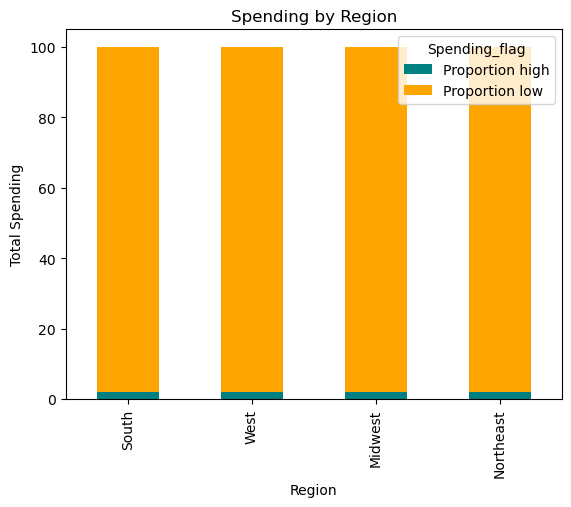

In [35]:
#Create stacked bar chart
cross_reg_spend_bar  = cross_reg_spend[['Proportion high', 'Proportion low']].plot.bar(stacked=True, color=["teal", "orange"])
plt.title('Spending by Region')
plt.xlabel
plt.ylabel('Total Spending')

Text(0, 0.5, 'Total Spending')

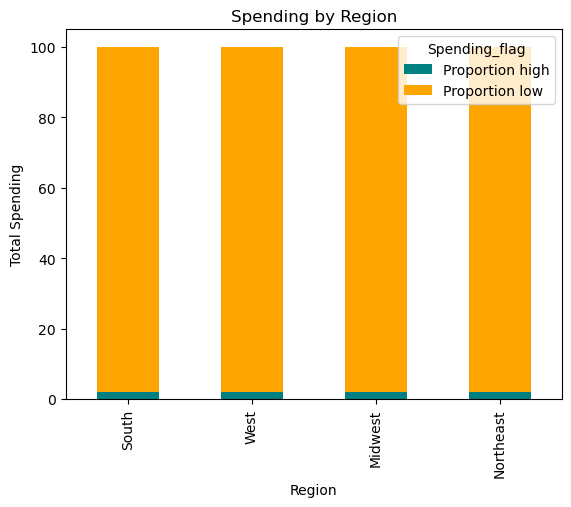

In [36]:
#Save stacked bar chart to Jupyter’s memory 
cross_reg_spend_bar = cross_reg_spend[['Proportion high', 'Proportion low']].plot.bar(stacked=True, color=["teal", "orange"])
plt.title('Spending by Region')
plt.xlabel
plt.ylabel('Total Spending')

In [37]:
cross_reg_spend_bar.figure.tight_layout()

In [ ]:
#Export cross_reg_spend_bar chart in the form of an image .png file
cross_reg_spend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Cross_regional_spending_bar.png')) 

In [ ]:
#Create crosstab of Region and Frequency flag columns to examine differences in ordering habits
cross_reg_freq = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['Frequency flag'], dropna = False)

In [ ]:
#Check output
cross_reg_freq

In [ ]:
#Export of ords_prods_merge
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_all.pkl'))